# Data analysis in Astronomy 

### Homework 3 due 12/3 11:59 pm

### Name:

In [2]:
import numpy as np
import astropy.io.fits as pf
import matplotlib.pyplot as plt
#import my_plot_style as mps
import matplotlib.cm as cm
import importlib
import scipy.stats as ss
#from kapteyn import kmpfit

### 1. A few weeks ago, you have learned how to do simple cross-correlation measurements. 
### Now extend your code to calculate mean($\delta y$) (mean(y_x)-mean(y_0)) when x = 1, 2, 3, 4. Estimate the uncertainty with bootstrap. 
### To do: 
### a. Estimate the uncertainty with the error of the mean and propagate the uncertainty. Compare the estimated uncertainty based on the error propagation and bootstrapping. (15 points) 
### b. Produce a plot with xaxis showing x=[1,2,3,4], and with yaxis showing the corresponding delta y values. (Please include the uncertainty) (15 points)

you can find the data at https://www.dropbox.com/s/ak159coklf1eplf/simple_correlation_10000_x_y_01234.npy?dl=0
### c. Do the linear regression with a model, delta y= a x, and get the best fit a parameter value. Plot your best-fit model in the figure. (20 points) 

In [4]:
data = np.load('/content/simple_correlation_10000_x_y_01234.npy') 
data

array([[  3.        ,   4.        ,   2.        , ...,   2.        ,
          1.        ,   1.        ],
       [110.8646095 ,  77.00861213,  95.23853025, ...,  91.26885124,
        100.76836802,  85.52701498]])

In [5]:
x = data[0]
y = data[1]
idx = []

for i in range(0,5):
  idx.append(np.where(x==i)[0])

means = []
values = []
err = []
for i in range(0,5):
  temp = []
  for j in range(len(idx[i])):
    temp.append(y[idx[i][j]])
  means.append(np.average(temp))
  err.append(np.std(temp))
  values.append(temp)
  print('y_'+str(i)+' = '+str(means[i]))

y_0 = 99.98398407376219
y_1 = 100.84690588582916
y_2 = 101.97228504241363
y_3 = 102.75090656125998
y_4 = 104.25509989959868


In [6]:
def BootStrap_Error(a,b,n):
  size_of_list = np.min([len(a),len(b)])
  
  diff = []
  for t in range(n):
    idx_a = np.random.randint(size_of_list, size=size_of_list)
    idx_b = np.random.randint(size_of_list, size=size_of_list)
    temp = []
    for i in range(size_of_list):
      temp.append(a[idx_a[i]]-b[idx_b[i]])
    diff.append(np.average(temp))

  return np.std(diff)#/(size_of_list)**0.5
def Propagation_Error(a,b):
  err_a = np.std(a)
  err_b = np.std(b)
  return (err_a**2/(len(a))+err_b**2/(len(b)))**0.5

print(BootStrap_Error(values[1],values[0],200))
print(Propagation_Error(values[1],values[0]))

0.33288707660255534
0.31497545029801116


In [7]:
BootStrap_Uncertainty = []
ErrorPropagation_Uncertainty = []
for i in range(1,5):
  BootStrap_Uncertainty.append(BootStrap_Error(values[i],values[0],200))
  ErrorPropagation_Uncertainty.append(Propagation_Error(values[i],values[0]))
  print('Bootsrap uncertainty for y_'+str(i)+'-y_0='+str(BootStrap_Uncertainty[i-1]))
  print('Error propagation uncertainty for y_'+str(i)+'-y_0='+str(ErrorPropagation_Uncertainty[i-1]))

Bootsrap uncertainty for y_1-y_0=0.30115931917764505
Error propagation uncertainty for y_1-y_0=0.31497545029801116
Bootsrap uncertainty for y_2-y_0=0.33403526426981817
Error propagation uncertainty for y_2-y_0=0.3205193253670117
Bootsrap uncertainty for y_3-y_0=0.32163396984192094
Error propagation uncertainty for y_3-y_0=0.3169106197181442
Bootsrap uncertainty for y_4-y_0=0.3408938099991459
Error propagation uncertainty for y_4-y_0=0.31961733705660983


Model Parameter: a = 0.8243298784849247


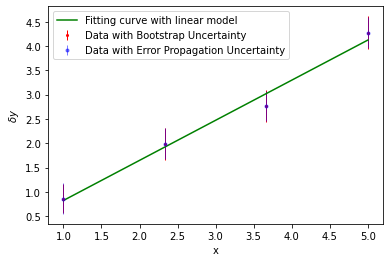

In [21]:
x_value = np.linspace(1,5,4)
delta_y = []
for i in range(1,5):
  delta_y.append(means[i]-means[0])
from scipy.optimize import curve_fit
def model(x, a):
  return a*x
popt, pcov = curve_fit(model, x_value, delta_y)
fitting_curve = model(x_value, *popt)
print('Model Parameter: a = '+str(popt[0]))

yerr1 = BootStrap_Uncertainty
yerr2 = ErrorPropagation_Uncertainty
plt.plot(x_value,fitting_curve,label='Fitting curve with linear model',color='green')
plt.errorbar(x_value,delta_y, yerr=yerr1, label='Data with Bootstrap Uncertainty',lw=0.0,color ='red',marker='o', markersize=2,\
              ecolor='red', elinewidth=1.0,)
plt.errorbar(x_value,delta_y, yerr=yerr2, label='Data with Error Propagation Uncertainty',lw=0.0,color ='blue', marker='o', markersize=3,\
              ecolor='blue', elinewidth=1.0, alpha=0.5)
plt.xlabel('x')
plt.ylabel(r'$\delta y$')
plt.legend(loc='best')
plt.show()

### -----------------------------------------------------------------------------------------------------------------

### 2. Estimating the best-fit parameter with bootstrap

### Previously, we used Hubble's data to demonstrate how to perform linear regression to obtain the best fit Hubble constant without estimating its uncertainty.

### To do:

### a. Write a code to estimate the uncertainty with the bootstrap method. (20 points) 

In [ ]:
# https://www.dropbox.com/s/c8qomgjpbvlj87o/hubble_original_data.fits?dl=0

In [31]:
data = pf.getdata('./hubble_original_data.fits',1) 

In [32]:
x = data['distance']
y = data['velocity']

In [24]:
#from kapteyn import kmpfit

In [33]:
def linear_model(p, x):       # The model that should represent the data
    a =  p            # p == (a,b)
    return a*x

In [34]:
def residual(p, data):
    x, y   = data
    return (y-linear_model(p,x))#/err # The algorithm will do the square

In [38]:
x = data['distance'].astype('float64')
y = data['velocity'].astype('float64')

from scipy.optimize import minimize
def res(p):
  return np.sum((y-linear_model(p,x))**2)
   
Fitted_Hubble_Constant = minimize(res,0.1, method='nelder-mead').x[0]
print(Fitted_Hubble_Constant)
"""fitobj = kmpfit.Fitter(residuals=residual, data=(x,y))
paramsinitial = [75]
fitobj.fit(params0=paramsinitial)"""

422.7211718750014


'fitobj = kmpfit.Fitter(residuals=residual, data=(x,y))\nparamsinitial = [75]\nfitobj.fit(params0=paramsinitial)'

In [39]:
#print('The hubble constant is %0.2f [km/s/Mpc]' % fitobj.params[0])
print('The hubble constant is %0.2f [km/s/Mpc]' % Fitted_Hubble_Constant)

The hubble constant is 422.72 [km/s/Mpc]


Text(0, 0.5, 'Velocity [km/s]')

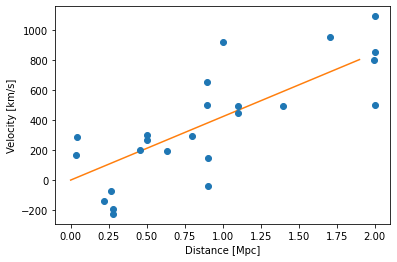

In [40]:
plt.errorbar(data['distance'],data['velocity'],ls='',marker='o')
#plt.plot(np.arange(0,2.,0.1),linear_model(fitobj.params[0],np.arange(0,2.,0.1)))
plt.plot(np.arange(0,2.,0.1),linear_model(Fitted_Hubble_Constant,np.arange(0,2.,0.1)))
plt.xlabel('Distance [Mpc]')
plt.ylabel('Velocity [km/s]')

In [47]:
def BootStrap_Uncertainty_Hubble_Constant(n):
  x = data['distance'].astype('float64')
  y = data['velocity'].astype('float64')
  size = len(x)
  Hubble_Constant = []
  for t in range(n):
    idx = np.random.randint(size, size=size)
    x0 = []
    y0 = []
    for i in range(size):
      x0.append(x[idx[i]])
      y0.append(y[idx[i]])
    def res(p):
      return np.sum((y0-linear_model(p,x0))**2)
    h = minimize(res,0.1, method='nelder-mead').x[0]
    Hubble_Constant.append(h)
  return np.std(Hubble_Constant)
print('Bootstrap Uncertainty of Hubble Constant:'+str(BootStrap_Uncertainty_Hubble_Constant(1000)))

Bootstrap Uncertainty of Hubble Constant:42.26445043565687


### -----------------------------------------------------------------

### 3. Measuring the rest equavalent width

### The rest equivalent width (the area of flux absorbed by the gas) of an absorption line contains physical information about the abundance of the gas. Astronomers frequently need to measure the rest equivalent width of absorption lines. 

### We now have 6 absorption line spectra. The two absorption lines are MgII 2796 and 2803. Their exact wavelengths are 2796.35 and 2803.53 Angstrom. 

### The goal is to obtain the rest equivalent widths of the two absorption lines for the 6 spectra. 

### To do:

### 1. Write a function consisting of two gaussians with central wavelengths at 2796.35 and 2803.53 Angstrom and obtain the best fit parameters of the gaussians. Based on the best fit parameters, you can get the rest equivalent widths of the absorption lines and the uncertainty of the rest equivalent widths. (You need to input the error array as well when doing the fitting.) (15 points) 

### 2. Plot the best fit models with the absorption line spectra together to demonstrate that what you get is truly the best fit models. (Similar to Figure 11 in https://ui.adsabs.harvard.edu/abs/2017ApJ...850..156L/abstract) (15 points) 

You can find the data at https://www.dropbox.com/s/bp63yptckslvzd5/Simple_absorption_line_spectra.fits?dl=0

The data structure can be found below. 

In [48]:
data = pf.open('Simple_absorption_line_spectra.fits')

In [49]:
spectra = data[0].data
error = data[1].data
wavelength = data[2].data

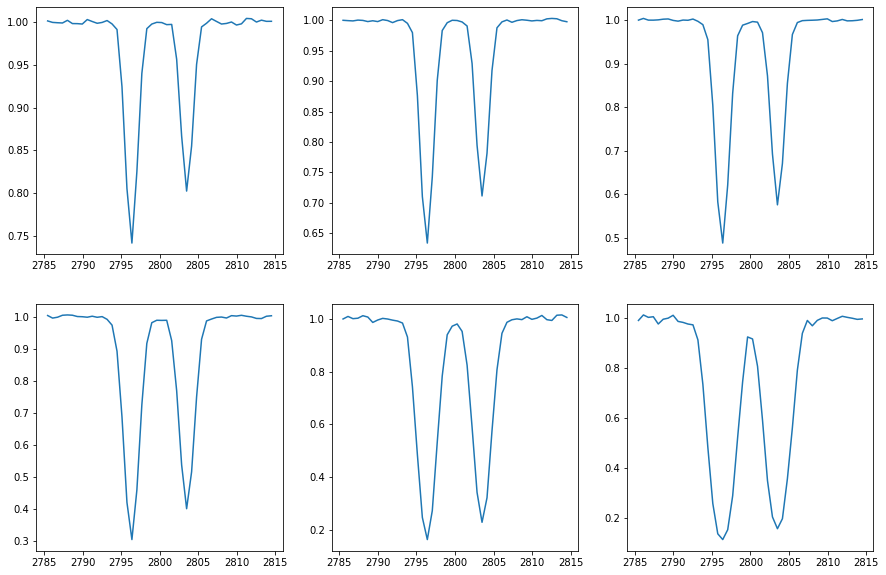

In [50]:
plt.figure(figsize=(15,10))
for i in range(0,len(spectra[:,0])):
    plt.subplot(2,3,i+1)
    plt.plot(wavelength,spectra[i,:])

In [69]:
def DoubleGaussianModel(x,a1,a2,d1,d2,c):
  size = len(x)
  x1 = x-2796.35*np.ones(size)
  x2 = x-2803.53*np.ones(size)
  f1 = a1*np.exp(-x1**2/d1**2)
  f2 = a2*np.exp(-x2**2/d2**2)
  return f1+f2+c*np.ones(size)

def residual(x,y,err,a1,a2,d1,d2,c):
  return np.sum((y-DoubleGaussianModel(x,a1,a2,d1,d2,c))**2/err**2)
from scipy.optimize import minimize
from scipy.optimize import minimize_scalar
def Find_Model_Parameter(i):
  x = wavelength
  y = spectra[i]
  err = error[i]
  def f(x0):
    a1,a2,d1,d2,c = x0
    return residual(x,y,err,a1,a2,d1,d2,c)
  x0 = [0.3,0.3,2,2,1]
  bnds =((-1.0,0),(-1.0,0),(0,10),(0,10),(0.9,1.0))
  para = minimize(f,x0, method='TNC', bounds=bnds).x
  #para = minimize_scalar(f, bounds=([-1.0,0],[-1.0,0],[0,10],[0,10],[0.9,1.0]), method='bounded')
  return para
    

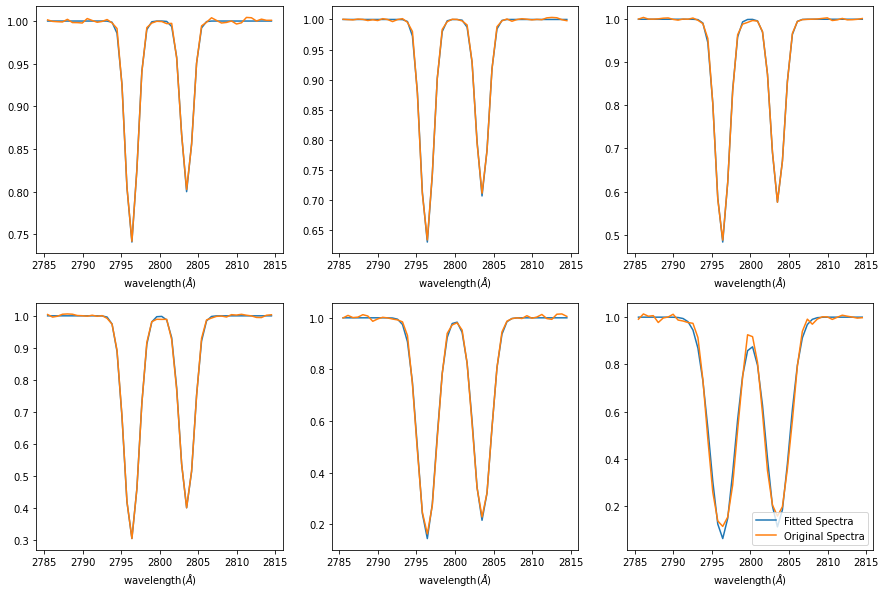

In [72]:
plt.figure(figsize=(15,10))
for i in range(6):
  a1,a2,d1,d2,c = Find_Model_Parameter(i)
  y_fitted = DoubleGaussianModel(wavelength,a1,a2,d1,d2,c)
  y_data  = spectra[i]
  plt.subplot(2,3,i+1)
  plt.plot(wavelength,y_fitted,label='Fitted Spectra')
  plt.plot(wavelength,y_data,label='Original Spectra')
  plt.xlabel(r'wavelength($\AA$)')
plt.legend()
plt.show()